In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

## 1. Reading and Inspecting Data

In [2]:
import numpy as np
import pandas as pd

### Reading and Inspecting data

#### Reading Data

In [3]:
car_price = pd.read_csv("C:/PGDDS/Machine_learning/linear_regression/assignment/CarPrice_Assignment.csv")
car_price.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


#### Inspecting car_price data

In [4]:
car_price.shape

(205, 26)

In [5]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [6]:
car_price.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### <span style='color:blue'>__Problem statement assumption__</span>
As per the problem statement
- There is a variable named __CarName__ which is comprised of two parts - the __first word is the name of 'car company'__ and the __second is the 'car model'__.<br>
- And we need to __consider only company name__ as the independent variable for model building. 

#### Handling problem statement assumption

In [7]:
# Fetching only first word of CarName and storing back into CarName
car_price['CarName'] = car_price['CarName'].map(lambda x: x.split(' ',1)[0])

### Data cleaning

#### Checking duplicate values

In [8]:
# To verify if any duplicate row is present or not
car_price.duplicated(subset = ['car_ID']).sum()

0

We observed that there are no duplicate values in the dataframe

#### Dropping unnecessary columns

In [9]:
# We can remove car_ID as it is just a sequence of number and doesn't give any useful information
car_price.drop(['car_ID'], axis=1, inplace=True)
car_price.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### Data Quality Issues

#### Inspecting any null values

In [10]:
# Percentage wise null values in different columns
print(100*(car_price.isnull().sum()/len(car_price.index)))
print("\n")

# Count of null values in different columns
print(car_price.isnull().sum())

symboling           0.0
CarName             0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
dtype: float64


symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio

There are __no null values__ present in any column of dataframe so we are proceed further.

#### carName observation
By going through carName column we found that there are spelling mismatch.<br>
For example 
1. __maxda glc deluxe__ and __mazda glc deluxe__ has car name mismatch. 
2. __vokswagen rabbit__ , __vw rabbit__ and __volkswagen rabbit__ has car name mismatch.

We need to fix this. 

In [11]:
# count of unique CarName names
print(car_price['CarName'].nunique())
print("\n")

# unique CarName names
print(car_price['CarName'].unique())

28


['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'maxda' 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'nissan' 'peugeot'
 'plymouth' 'porsche' 'porcshce' 'renault' 'saab' 'subaru' 'toyota'
 'toyouta' 'vokswagen' 'volkswagen' 'vw' 'volvo']


We can see that there are spelling mismatches in car names like 
1. __mazda__ as __maxda__
2. __nissan__ as __Nissan__
3. __porsche__ as __porcshce__
4. __toyota__ as __toyouta__
5. __volkswagen__ as __vokswagen__ and __vw__
So, fixing this

In [12]:
car_price['CarName'] = car_price['CarName'].str.replace('maxda','mazda')
car_price['CarName'] = car_price['CarName'].str.replace('Nissan','nissan')
car_price['CarName'] = car_price['CarName'].str.replace('porcshce','porsche')
car_price['CarName'] = car_price['CarName'].str.replace('toyouta','toyota')
car_price['CarName'] = car_price['CarName'].str.replace('vokswagen','volkswagen')
car_price['CarName'] = car_price['CarName'].str.replace('vw','volkswagen')

In [13]:
# count of unique CarName names
print(car_price['CarName'].nunique())
print("\n")

# unique CarName names
print(car_price['CarName'].unique())

22


['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


#### Data Inspection after Data cleaning and handling Data quality issues

In [14]:
print(car_price.shape)
print("\n")

print(car_price.info())

(205, 25)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
c

## 2. Visualising the data

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Visualising numercial variables

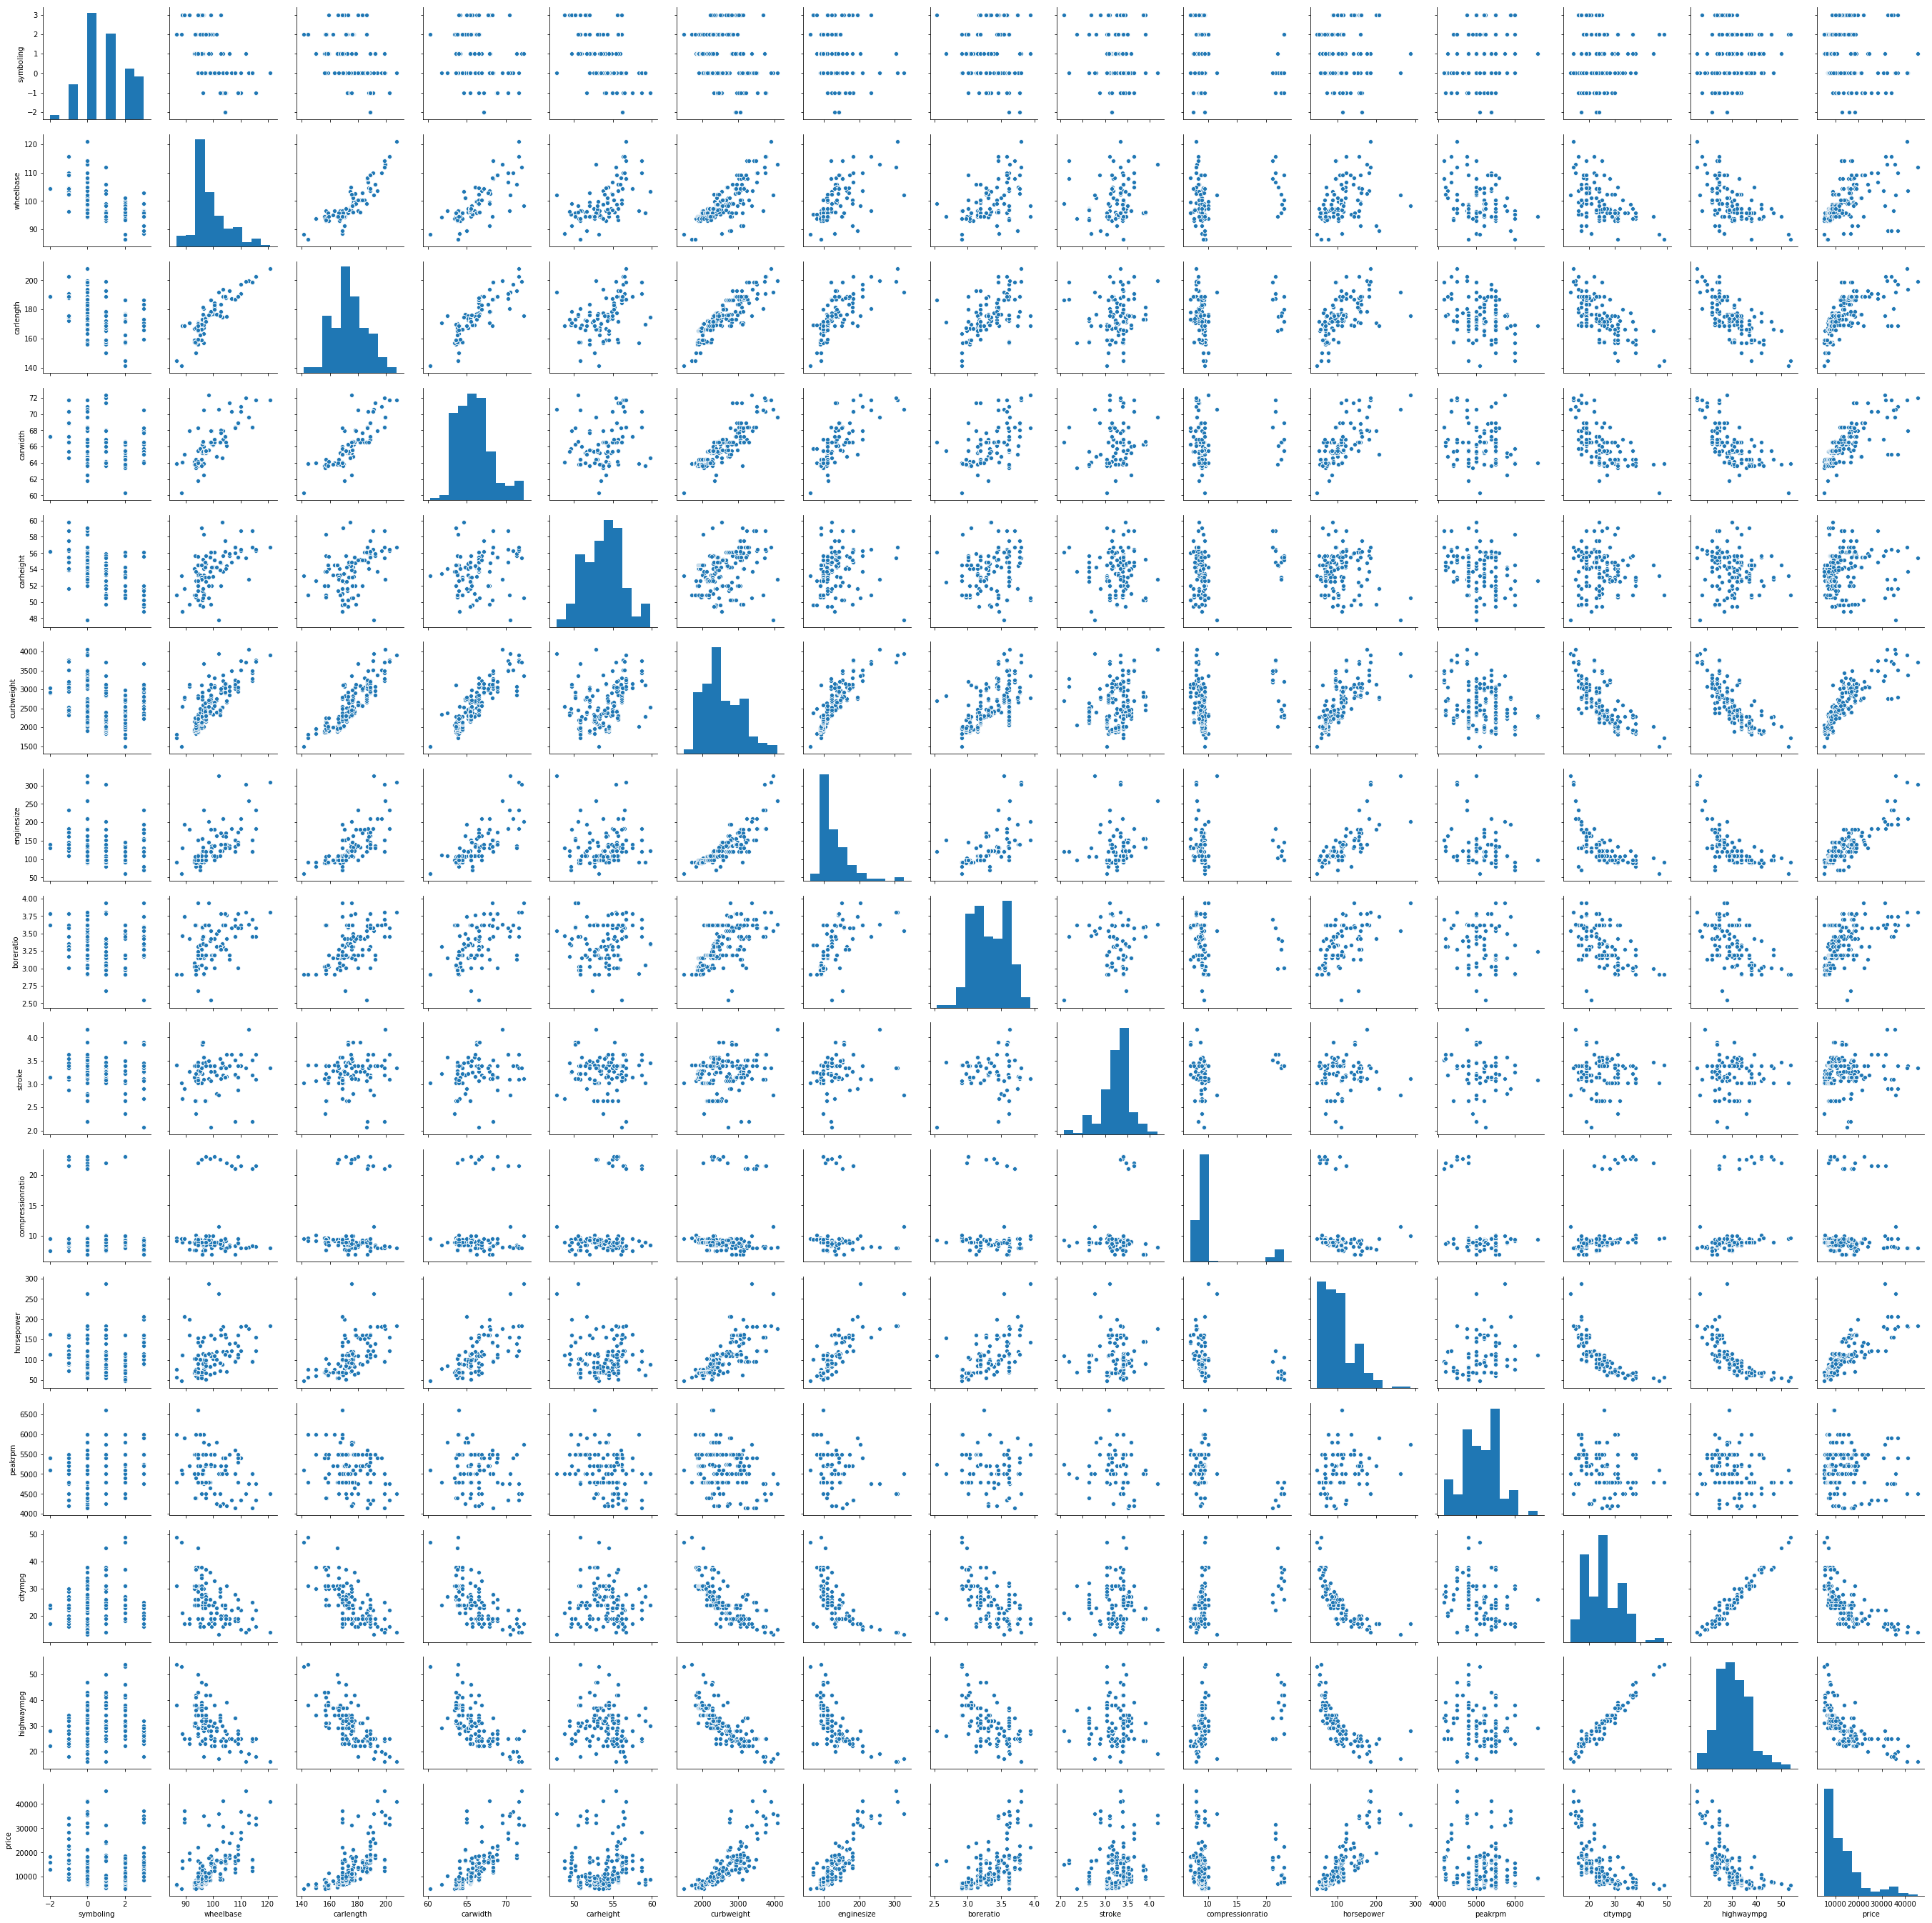

In [16]:
sns.pairplot(car_price)
plt.show()

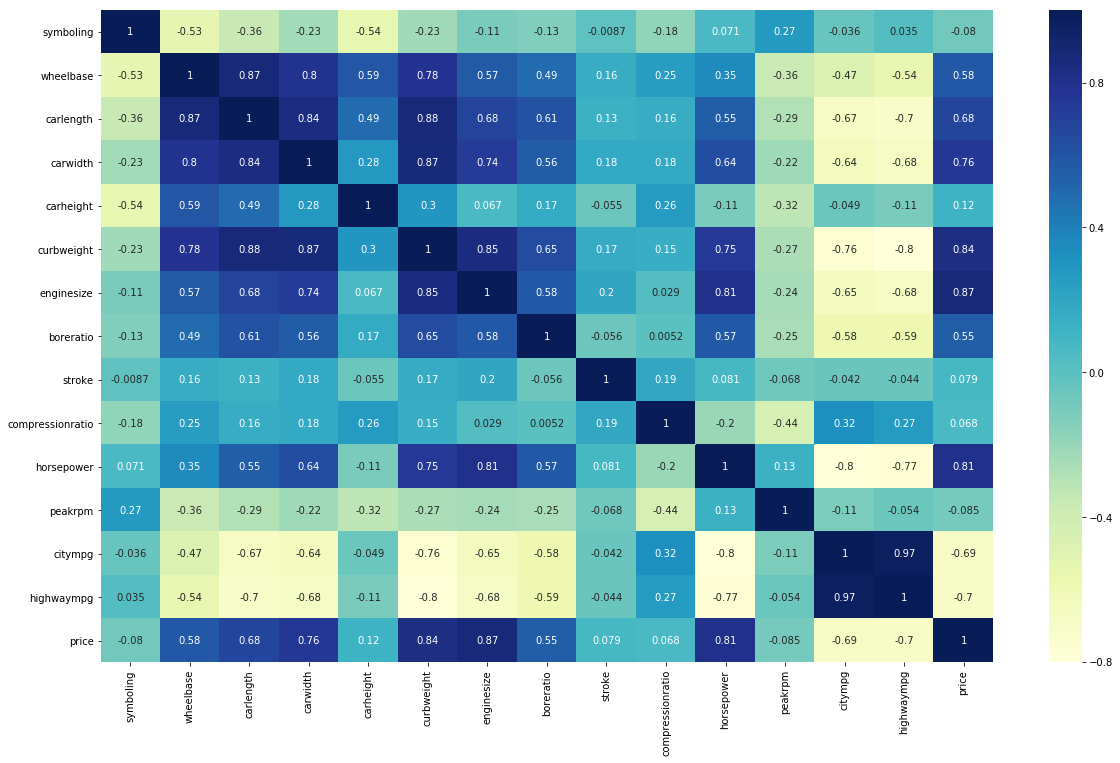

In [17]:
# Heatmap for numerical variables
plt.figure(figsize=(20,12))
sns.heatmap(car_price.corr(), cmap='YlGnBu', annot=True)
plt.show()

#### Correlation matrix observation
We can observe that there is strong corelation between __price and following variables__:
- __price and enginesize with value 0.87__
- __price and curbweight with value 0.84__
- __price and horsepower with value 0.81__
- __price and carwidth with value 0.76__
- __price and carlength with value 0.68__

We can also observe that __wheelbase__ is corelated with
- __carlength with value 0.87__
- __carwidth with value 0.80__
- __curbweight with value 0.78__

We can also observe that __carlength__ is corelated with
- __carwidth with value 0.84__
- __curbweight with value 0.88__
- __enginesize with value 0.68__

We can also observe that __carwidth__ is corelated with
- __curbweight with value 0.87__
- __enginesize with value 0.74__

We can also observe that __horsepower__ is corelated with
- __enginesize with value 0.81__
- __curbweight with value 0.75__
- __carwidth with value 0.64__

We can also observe that __citympg__ and __highwaympg__ is highly corelated with value equals __0.97__

### <span style="color:blue">Assumption</span>
Although based on these corelation we can drop some highly corelated variables, but it would become to early to predict independent(predictor) variable.

So decided <span style="color:red">__Not to drop any column upfront__</span>

Will check during model building for p-value and VIF and other statistics to decide the significant variables

#### Visualising categorical variables

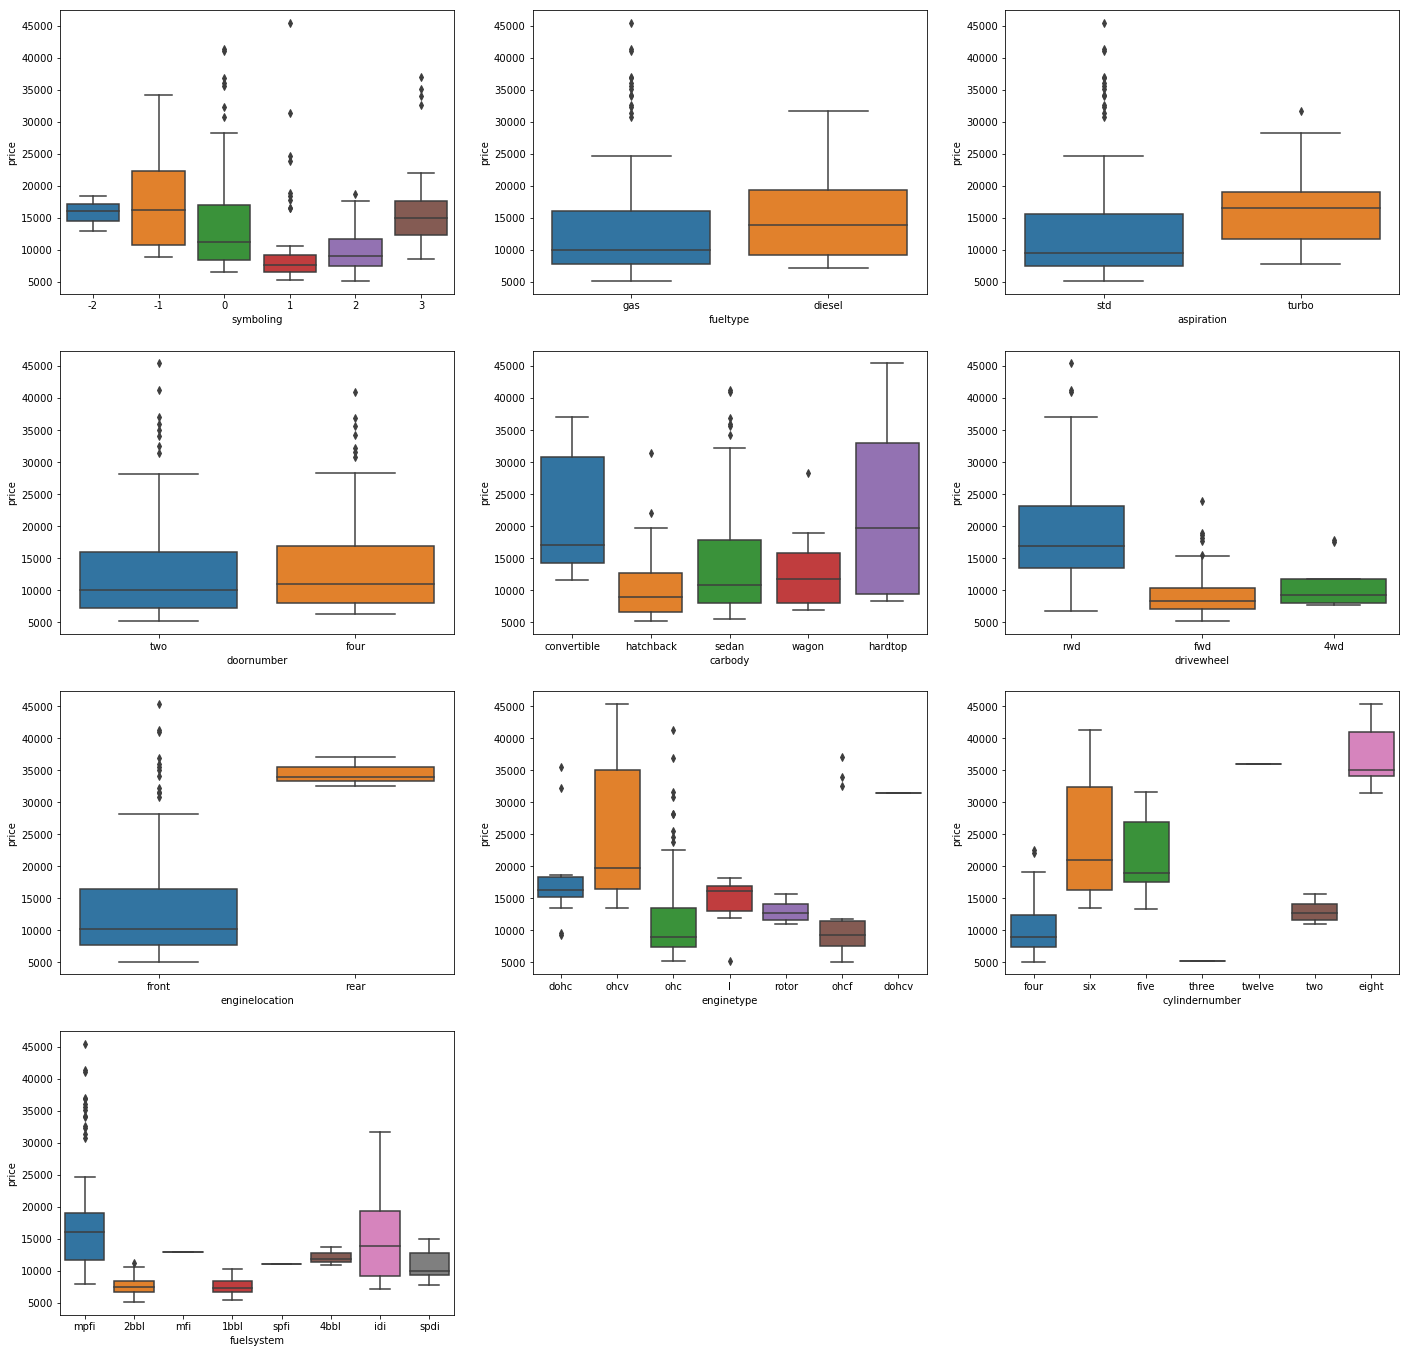

In [18]:
plt.figure(figsize=(24,24))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = car_price)
plt.subplot(4,3,2)
sns.boxplot(x = 'fueltype', y = 'price', data = car_price)
plt.subplot(4,3,3)
sns.boxplot(x = 'aspiration', y = 'price', data = car_price)
plt.subplot(4,3,4)
sns.boxplot(x = 'doornumber', y = 'price', data = car_price)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = car_price)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = car_price)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginelocation', y = 'price', data = car_price)
plt.subplot(4,3,8)
sns.boxplot(x = 'enginetype', y = 'price', data = car_price)
plt.subplot(4,3,9)
sns.boxplot(x = 'cylindernumber', y = 'price', data = car_price)
plt.subplot(4,3,10)
sns.boxplot(x = 'fuelsystem', y = 'price', data = car_price)
plt.show()

### <span style="color:blue">Assumption</span>
We can observe some outliers in every variable but the data only contains 205 rows so it would not be feasible to reduce the data.

So decided <span style="color:red">__not to perform outlier treatment because of less data(number of rows)__</span>

## 3. Data Preparation

#### Categorical columns
- We can see that dataset contains columns having two categorical values like fueltype(diesel, gas), aspiration(std, turbo) etc

- To fit a regression line, we need numerical values and not string. Hence, we need to convert them to binary values of 0 and 1.

#### Converting categorical variables having two level into binary values of 0 and 1

In [19]:
# fueltype has two values diesel and gas, mapping gas to 0 and diesel to 1
car_price['fueltype'] = car_price['fueltype'].map({'gas':0, 'diesel':1 })


# aspiration has two values std and turbo, mapping turbo to 0 and std to 1 
car_price['aspiration'] = car_price['aspiration'].map({'turbo':0 , 'std':1})


# doornumber has two values two or four, mapping two to 0 and four to 1
car_price['doornumber'] = car_price['doornumber'].map({'two':0, 'four':1})


# enginelocation has two values front and rear, mapping front to 0 and rear to 1
car_price['enginelocation'] = car_price['enginelocation'].map({'front':0, 'rear':1})

In [20]:
# Checking the car_price again
car_price.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero,0,1,0,convertible,rwd,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero,0,1,0,convertible,rwd,0,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero,0,1,0,hatchback,rwd,0,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi,0,1,1,sedan,fwd,0,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi,0,1,1,sedan,4wd,0,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [21]:
car_price.shape

(205, 25)

In [22]:
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null int64
aspiration          205 non-null int64
doornumber          205 non-null int64
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null int64
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg          

In [23]:
car_price.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.097561,0.819512,0.560976,0.014634,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,0.297446,0.385535,0.497483,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,0.000000,0.000000,0.000000,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,0.000000,1.000000,1.000000,0.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,0.000000,1.000000,1.000000,0.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,1.000000,1.000000,1.000000,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Dummy variable creation

#### Creating dummy variables for the variable having more than 2 levels
- carbody
- drivewheel
- enginetype
- cylindernumber
- fuelsystem
- CarName

#### Creating dummy variable for CarName

In [24]:
df_dummy1 = pd.get_dummies(car_price['CarName'], drop_first = True)
df_dummy1.head()

,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercury,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
car_price = pd.concat([car_price, df_dummy1], axis=1)
car_price.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,nissan,peugeot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo
0,3,alfa-romero,0,1,0,convertible,rwd,0,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
1,3,alfa-romero,0,1,0,convertible,rwd,0,88.6,168.8,...,0,0,0,0,0,0,0,0,0,0
2,1,alfa-romero,0,1,0,hatchback,rwd,0,94.5,171.2,...,0,0,0,0,0,0,0,0,0,0
3,2,audi,0,1,1,sedan,fwd,0,99.8,176.6,...,0,0,0,0,0,0,0,0,0,0
4,2,audi,0,1,1,sedan,4wd,0,99.4,176.6,...,0,0,0,0,0,0,0,0,0,0


In [26]:
# Drop CarName as we have created the dummies for it
car_price.drop(['CarName'], axis = 1, inplace = True)

#### Creating dummy variable for carbody

In [27]:
df_dummy2 = pd.get_dummies(car_price['carbody'], drop_first = True)
df_dummy2.head()

,hardtop,hatchback,sedan,wagon
0,0,0,0,0
1,0,0,0,0
2,0,1,0,0
3,0,0,1,0
4,0,0,1,0


In [28]:
car_price = pd.concat([car_price, df_dummy2], axis=1)
car_price.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,renault,saab,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon
0,3,0,1,0,convertible,rwd,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
1,3,0,1,0,convertible,rwd,0,88.6,168.8,64.1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,hatchback,rwd,0,94.5,171.2,65.5,...,0,0,0,0,0,0,0,1,0,0
3,2,0,1,1,sedan,fwd,0,99.8,176.6,66.2,...,0,0,0,0,0,0,0,0,1,0
4,2,0,1,1,sedan,4wd,0,99.4,176.6,66.4,...,0,0,0,0,0,0,0,0,1,0


In [29]:
# Drop carbody as we have created the dummies for it
car_price.drop(['carbody'], axis = 1, inplace = True)

#### Creating dummy variable for drivewheel

In [30]:
df_dummy3 = pd.get_dummies(car_price['drivewheel'], drop_first = True)
df_dummy3.head()

,fwd,rwd
0,0,1
1,0,1
2,0,1
3,1,0
4,0,0


In [31]:
car_price = pd.concat([car_price, df_dummy3], axis=1)
car_price.head()

,symboling,fueltype,aspiration,doornumber,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,subaru,toyota,volkswagen,volvo,hardtop,hatchback,sedan,wagon,fwd,rwd
0,3,0,1,0,rwd,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,1
1,3,0,1,0,rwd,0,88.6,168.8,64.1,48.8,...,0,0,0,0,0,0,0,0,0,1
2,1,0,1,0,rwd,0,94.5,171.2,65.5,52.4,...,0,0,0,0,0,1,0,0,0,1
3,2,0,1,1,fwd,0,99.8,176.6,66.2,54.3,...,0,0,0,0,0,0,1,0,1,0
4,2,0,1,1,4wd,0,99.4,176.6,66.4,54.3,...,0,0,0,0,0,0,1,0,0,0


In [32]:
# Drop drivewheel as we have created the dummies for it
car_price.drop(['drivewheel'], axis = 1, inplace = True)

#### Creating dummy variable for enginetype

In [33]:
df_dummy4 = pd.get_dummies(car_price['enginetype'], drop_first = True)
df_dummy4.head()

,dohcv,l,ohc,ohcf,ohcv,rotor
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0


In [34]:
car_price = pd.concat([car_price, df_dummy4], axis=1)
car_price.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,sedan,wagon,fwd,rwd,dohcv,l,ohc,ohcf,ohcv,rotor
0,3,0,1,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
1,3,0,1,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,0,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,1,0,0,0,0,1,0
3,2,0,1,1,0,99.8,176.6,66.2,54.3,2337,...,1,0,1,0,0,0,1,0,0,0
4,2,0,1,1,0,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,0,0,1,0,0,0


In [35]:
# Drop enginetype as we have created the dummies for it
car_price.drop(['enginetype'], axis = 1, inplace = True)

#### Creating dummy variable for cylindernumber 

In [36]:
df_dummy5 = pd.get_dummies(car_price['cylindernumber'], drop_first = True)
df_dummy5.head()

,five,four,six,three,twelve,two
0,0,1,0,0,0,0
1,0,1,0,0,0,0
2,0,0,1,0,0,0
3,0,1,0,0,0,0
4,1,0,0,0,0,0


In [37]:
car_price = pd.concat([car_price, df_dummy5], axis=1)
car_price.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohc,ohcf,ohcv,rotor,five,four,six,three,twelve,two
0,3,0,1,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,0
1,3,0,1,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,0,94.5,171.2,65.5,52.4,2823,...,0,0,1,0,0,0,1,0,0,0
3,2,0,1,1,0,99.8,176.6,66.2,54.3,2337,...,1,0,0,0,0,1,0,0,0,0
4,2,0,1,1,0,99.4,176.6,66.4,54.3,2824,...,1,0,0,0,1,0,0,0,0,0


In [38]:
# Drop cylindernumber as we have created the dummies for it
car_price.drop(['cylindernumber'], axis = 1, inplace = True)

#### Creating dummy variable for fuelsystem

In [39]:
df_dummy6 = pd.get_dummies(car_price['fuelsystem'], drop_first = True)
df_dummy6.head()

,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0


In [40]:
car_price = pd.concat([car_price, df_dummy6], axis=1)
car_price.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,0,1,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,0,1,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,0,1,1,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,0,1,1,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [41]:
# Drop fuelsystem as we have created the dummies for it
car_price.drop(['fuelsystem'], axis = 1, inplace = True)

In [42]:
car_price.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,0,1,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,0,1,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,0,1,0,0,94.5,171.2,65.5,52.4,2823,...,0,0,0,0,0,0,0,1,0,0
3,2,0,1,1,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,0,1,1,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


## 4. Splitting the data into train and test set
We need to first perform the train-test-split

#### train-test-split

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
# We specify this so that train and test data set always have the same rows
np.random.seed(0)

df_train, df_test = train_test_split(car_price, train_size = 0.7, test_size = 0.3, random_state = 100 )

#### rescaling the features

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
scaler = MinMaxScaler()

In [47]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio',
            'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [48]:
df_train.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
122,0.6,0,1,1,0,0.244828,0.426016,0.291667,0.265487,0.272692,...,0,0,0,1,0,0,0,0,0,0
125,1.0,0,1,0,0,0.272414,0.452033,0.666667,0.212389,0.500388,...,0,0,0,0,0,0,0,1,0,0
166,0.6,0,1,0,0,0.272414,0.448780,0.308333,0.424779,0.314973,...,0,0,0,0,0,0,0,1,0,0
1,1.0,0,1,0,0,0.068966,0.450407,0.316667,0.088496,0.411171,...,0,0,0,0,0,0,0,1,0,0
199,0.2,0,0,1,0,0.610345,0.775610,0.575000,0.858407,0.647401,...,0,0,0,0,0,0,0,1,0,0


In [49]:
df_train.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0
mean,0.559441,0.090909,0.818182,0.559441,0.006993,0.411141,0.525476,0.461655,0.509004,0.407878,...,0.006993,0.006993,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0
std,0.239200,0.288490,0.387050,0.498199,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,...,0.083624,0.083624,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
25%,0.400000,0.000000,1.000000,0.000000,0.000000,0.272414,0.399187,0.304167,0.353982,0.245539,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
50%,0.600000,0.000000,1.000000,1.000000,0.000000,0.341379,0.502439,0.425000,0.522124,0.355702,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0
75%,0.600000,0.000000,1.000000,1.000000,0.000000,0.503448,0.669919,0.550000,0.668142,0.559542,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0


### <span style="color:blue">Assumption for Model building</span>
We are making threshold to retain variable in model as follows:
- <span style="color:red">__p-value less than 0.05__</span>
- <span style="color:red">__VIF less than 5__</span>

## 5. Building linear model

#### Dividing the dataset into X and Y sets for the model building 

In [50]:
# We want to predit price so this will be outcome variable and y set will be comprised of 'price' column
y_train = df_train.pop('price')

# Rest of the column will be treated as predictor variables
X_train = df_train

### <span style="color:blue">Method used</span>
- <span style="color:green">__For feature selection__</span> - We will be using <span style="color:red">__RFE(Recursive Feature Elimination) method__</span>
- <span style="color:green">__For model building with detailed statistics__</span> - We will be using <span style="color:red">__statsmodels.api__</span>

#### Feature selection usin RFE

In [51]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [52]:
# Running RFE with number of variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15) # running RFE
rfe = rfe.fit(X_train, y_train)

In [53]:
# Checking the variables significance and rankings
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('symboling', False, 32),
 ('fueltype', False, 22),
 ('aspiration', False, 9),
 ('doornumber', False, 38),
 ('enginelocation', True, 1),
 ('wheelbase', False, 10),
 ('carlength', False, 15),
 ('carwidth', True, 1),
 ('carheight', False, 12),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 23),
 ('horsepower', False, 5),
 ('peakrpm', False, 7),
 ('citympg', False, 34),
 ('highwaympg', False, 17),
 ('audi', False, 29),
 ('bmw', True, 1),
 ('buick', False, 36),
 ('chevrolet', False, 18),
 ('dodge', False, 14),
 ('honda', False, 16),
 ('isuzu', False, 45),
 ('jaguar', False, 27),
 ('mazda', False, 40),
 ('mercury', False, 46),
 ('mitsubishi', False, 6),
 ('nissan', False, 39),
 ('peugeot', False, 3),
 ('plymouth', False, 13),
 ('porsche', True, 1),
 ('renault', False, 33),
 ('saab', False, 11),
 ('subaru', False, 2),
 ('toyota', False, 42),
 ('volkswagen', False, 43),
 ('volvo', False, 41),
 ('hardtop', False,

In [54]:
# Taking those column having rank 1 (or are significant)
selected_col = X_train.columns[rfe.support_]

### Model Building

#### Linear Model 1- building using statsmodels.api

In [55]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[selected_col]

In [56]:
import statsmodels.api as sm

In __`statsmodels`__, we need to explicitly fit a constant using __`sm.add_constant(X)`__ 
because __`statsmodels`__ fits a regression line passing through the origin, by default.

In [57]:
# Adding constant
X_train_lm = sm.add_constant(X_train_rfe)

# Running the linear model
lm_1 = sm.OLS(y_train, X_train_lm).fit()

In [58]:
# Summary of linear model
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     124.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.71e-67
Time:                        22:58:19   Log-Likelihood:                 208.60
No. Observations:                 143   AIC:                            -387.2
Df Residuals:                     128   BIC:                            -342.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2330      0.042     -5.

#### Calculating VIF for the model

In [59]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,rotor,inf
14,two,inf
3,enginesize,70.990000
2,curbweight,47.650000
1,carwidth,40.910000
4,boreratio,40.420000
5,stroke,34.010000
11,four,24.200000
13,twelve,2.760000
10,five,2.530000


#### Checking correlation in independent variables after RFE

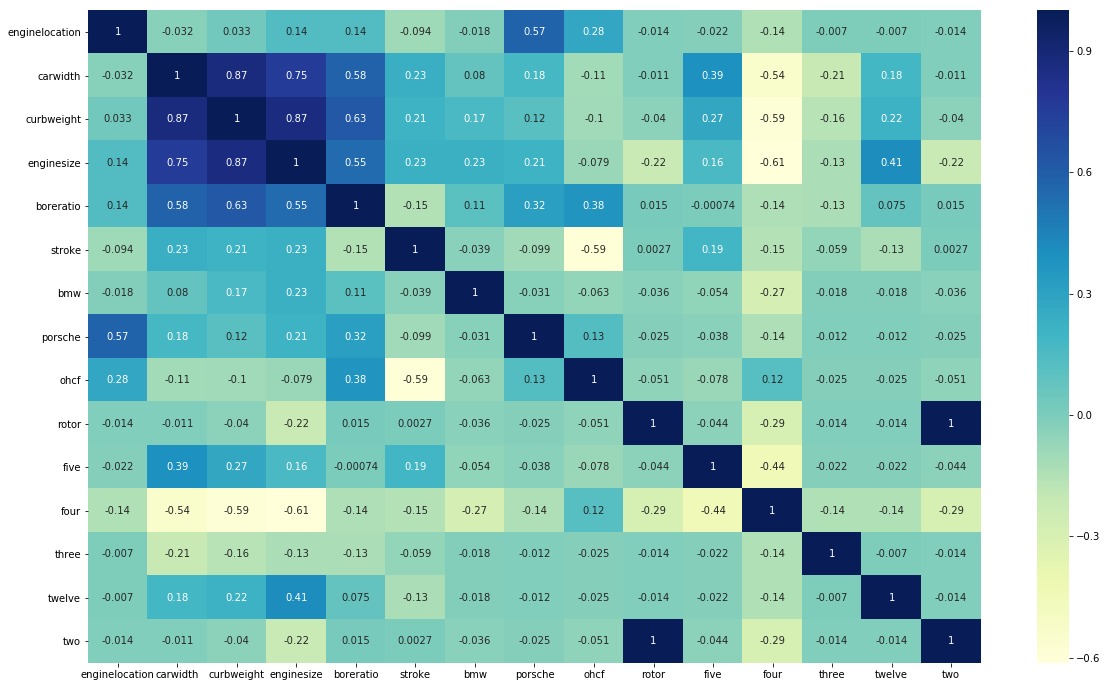

In [60]:
plt.figure(figsize=(20,12))
sns.heatmap(X_train_rfe.corr(), cmap='YlGnBu', annot=True)
plt.show()

#### Observation from VIF and Correlation matrix
We can observe from above correlation matrix that
- __rotor__ and __two__ are __highly correlated infact correlation is 1__

We can also see that both these variables has __VIF equals inf__

So dropping __rotor__ from train dataset and rebuilding model

#### Linear Model 2 - Rebuilding the model

In [61]:
# Dropping rotor based on high VIF and colinearity with two
X_train_2 = X_train_rfe.drop(['rotor'],axis=1)

In [62]:
import statsmodels.api as sm

# Adding constant
X_train_lm = sm.add_constant(X_train_2)

# Running the linear model
lm_2 = sm.OLS(y_train, X_train_lm).fit()

In [63]:
# Summary of linear model
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     124.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.71e-67
Time:                        22:58:20   Log-Likelihood:                 208.60
No. Observations:                 143   AIC:                            -387.2
Df Residuals:                     128   BIC:                            -342.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2330      0.042     -5.

In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,70.99
2,curbweight,47.65
1,carwidth,40.91
4,boreratio,40.42
5,stroke,34.01
10,four,24.20
13,two,3.74
12,twelve,2.76
9,five,2.53
8,ohcf,2.29


#### Linear Model 3 - Rebuilding the model
#### We can see that 
- ohcf has p-value 0.804 which is very high and is greater than 0.05 

Removing __ohcf__ and again building linear model

In [65]:
X_train_3 = X_train_2.drop(['ohcf'],axis=1)

In [66]:
import statsmodels.api as sm

# Adding constant
X_train_lm = sm.add_constant(X_train_3)

# Running the linear model
lm_3 = sm.OLS(y_train, X_train_lm).fit()

In [67]:
# Summary of linear model
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     134.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.35e-68
Time:                        22:58:20   Log-Likelihood:                 208.57
No. Observations:                 143   AIC:                            -389.1
Df Residuals:                     129   BIC:                            -347.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2284      0.038     -6.

In [68]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_3
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,enginesize,70.44
2,curbweight,44.30
1,carwidth,40.68
4,boreratio,34.50
5,stroke,30.89
9,four,24.00
12,two,3.74
11,twelve,2.74
8,five,2.49
7,porsche,1.92


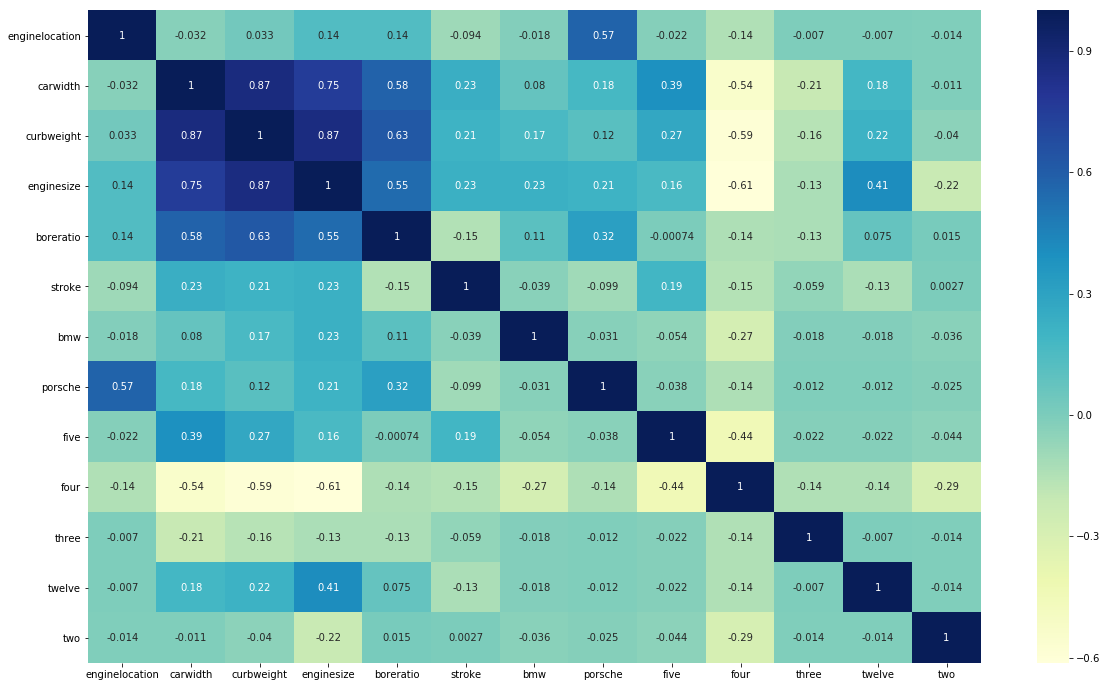

In [69]:
plt.figure(figsize=(20,12))
sns.heatmap(X_train_3.corr(), cmap='YlGnBu', annot=True)
plt.show()

#### <span style="color:blue">Observation from Corelation matrix, VIF and t-statistics</span>
- Although __enginesize__ has __VIF of 70.44__ but it has __t score more than 8__ that makes enginesize significant for prediction.<br>
- Whereas __curbweight__ has __VIF 44.30__ but it has __t score 3.45__.
<br>

Also from the above heatmap, it is evident that:
- __curbweight__ is highly corelated with __carwidth(0.87), enginesize(0.87)__. It means when one variable value increase other varible values also increases. And instead of two variable only one variable is sufficient for prediction.
<br>

So <span style="color:red">__enginesize__</span> seems to be more statistically significant than <span style="color:red">__curbweight__</span>

Retaining __enginesize__ for now and dropping __curbweight__

#### Linear Model 4 - Rebuilding the model
Removing __curbweight__ and again building linear model

In [70]:
X_train_4 = X_train_3.drop(['curbweight'],axis=1)

In [71]:
import statsmodels.api as sm

# Adding constant
X_train_lm = sm.add_constant(X_train_4)

# Running the linear model
lm_4 = sm.OLS(y_train, X_train_lm).fit()

In [72]:
# Summary of linear model
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     133.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.80e-67
Time:                        22:58:21   Log-Likelihood:                 202.23
No. Observations:                 143   AIC:                            -378.5
Df Residuals:                     130   BIC:                            -340.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.2415      0.039     -6.

In [73]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_4
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,enginesize,58.15
3,boreratio,34.01
4,stroke,30.47
1,carwidth,29.98
8,four,24.00
11,two,3.67
10,twelve,2.59
7,five,2.49
6,porsche,1.78
0,enginelocation,1.68


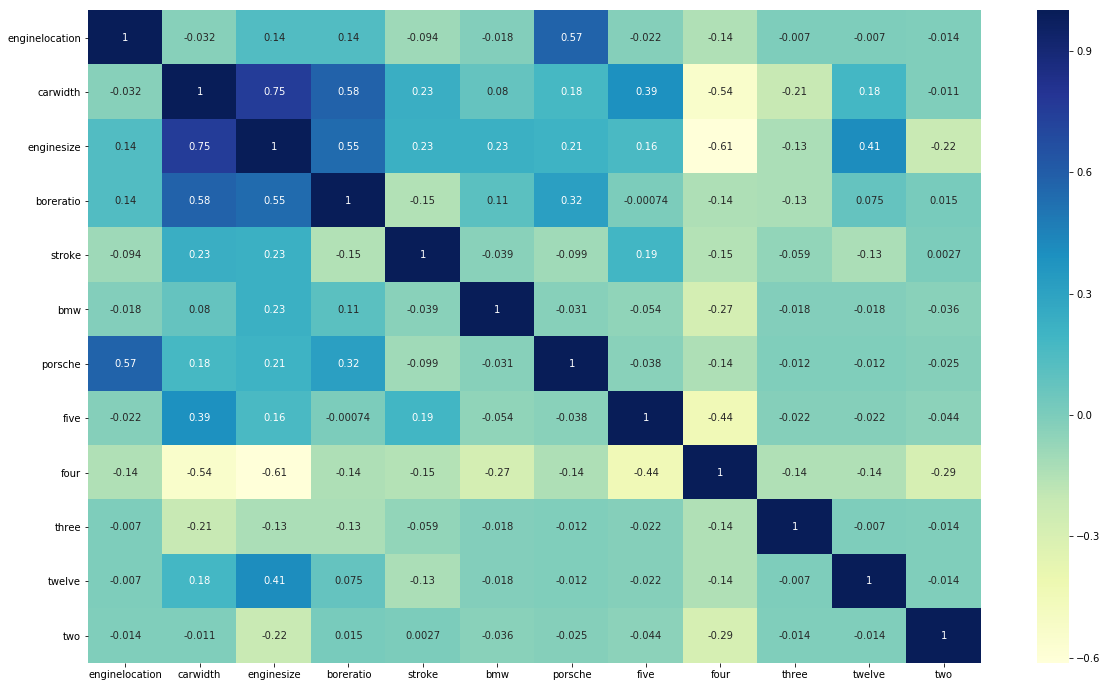

In [74]:
plt.figure(figsize=(20,12))
sns.heatmap(X_train_4.corr(), cmap='YlGnBu', annot=True)
plt.show()

#### <span style="color:blue">Observation from Corelation matrix, VIF and t-statistics</span>
- Again __enginesize__ has __VIF of 58.15__ but it has __t score more than 10__ that makes enginesize significant for prediction.<br>
- Whereas __boreratio__ has __VIF 34.01__ but it has __t score -5.567__.
<br>

Also from the above heatmap, it is evident that:
- __boreratio__ is highly corelated with __carwidth(0.58), enginesize(0.55)__. It means when one variable value increase other varible values also increases. And instead of two variable only one variable is sufficient for prediction.
<br>

So <span style="color:red">__enginesize__</span> seems to be more statistically significant than <span style="color:red">__boreratio__</span>

Retaining __enginesize__ for now and dropping __boreratio__

#### Linear Model 5 - Rebuilding the model
Removing __boreratio__ and again building linear model

In [75]:
X_train_5 = X_train_4.drop(['boreratio'],axis=1)

In [76]:
import statsmodels.api as sm

# Adding constant
X_train_lm = sm.add_constant(X_train_5)

# Running the linear model
lm_5 = sm.OLS(y_train, X_train_lm).fit()

In [77]:
# Summary of linear model
print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     116.5
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.17e-62
Time:                        22:58:22   Log-Likelihood:                 186.95
No. Observations:                 143   AIC:                            -349.9
Df Residuals:                     131   BIC:                            -314.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1703      0.041     -4.

In [78]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,29.51
2,enginesize,26.42
3,stroke,14.72
7,four,7.76
6,five,2.14
10,two,1.91
5,porsche,1.69
0,enginelocation,1.68
9,twelve,1.68
4,bmw,1.19


#### Linear Model 6 - Rebuilding the model

#### We can see that 
p-value of __four__ is __0.384__ which is greater than 0.05.<br>
So removing __four__ and again building linear model

In [79]:
X_train_6 = X_train_5.drop(['four'],axis=1)

In [80]:
import statsmodels.api as sm

# Adding constant
X_train_lm = sm.add_constant(X_train_6)

# Running the linear model
lm_6 = sm.OLS(y_train, X_train_lm).fit()

In [81]:
# Summary of linear model
print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     128.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.48e-63
Time:                        22:58:22   Log-Likelihood:                 186.53
No. Observations:                 143   AIC:                            -351.1
Df Residuals:                     132   BIC:                            -318.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1423      0.026     -5.

In [82]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_6
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,19.26
2,enginesize,13.80
3,stroke,7.36
5,porsche,1.68
0,enginelocation,1.63
8,twelve,1.47
6,five,1.26
9,two,1.21
4,bmw,1.19
7,three,1.03


#### Linear Model 7 - Rebuilding the model
#### We can see that 
p-value of __porsche__ is __0.090__ which is greater than 0.05.<br>
So removing __porsche__ and again building linear model

In [83]:
X_train_7 = X_train_6.drop(['porsche'],axis=1)

In [84]:
import statsmodels.api as sm

# Adding constant
X_train_lm = sm.add_constant(X_train_7)

# Running the linear model
lm_7 = sm.OLS(y_train, X_train_lm).fit()

In [85]:
# Summary of linear model
print(lm_7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     140.2
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.23e-63
Time:                        22:58:22   Log-Likelihood:                 184.96
No. Observations:                 143   AIC:                            -349.9
Df Residuals:                     133   BIC:                            -320.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1459      0.026     -5.

In [86]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_7
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,18.46
2,enginesize,13.80
3,stroke,6.91
7,twelve,1.45
5,five,1.24
8,two,1.21
4,bmw,1.19
0,enginelocation,1.11
6,three,1.03


#### Linear Model 8 - Rebuilding the model
Although p-value of carwidth is 0
From the VIF values we can observe that
- __carwidth has very high VIF 18.46__

So removing __carwidth__ and again building linear model

In [87]:
X_train_8 = X_train_7.drop(['carwidth'],axis=1)

In [88]:
import statsmodels.api as sm

# Adding constant
X_train_lm = sm.add_constant(X_train_8)

# Running the linear model
lm_8 = sm.OLS(y_train, X_train_lm).fit()

In [89]:
# Summary of linear model
print(lm_8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     115.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.22e-56
Time:                        22:58:23   Log-Likelihood:                 164.92
No. Observations:                 143   AIC:                            -311.8
Df Residuals:                     134   BIC:                            -285.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0498      0.025     -2.

In [90]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_8
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,5.70
2,stroke,4.85
6,twelve,1.38
3,bmw,1.16
4,five,1.12
7,two,1.09
0,enginelocation,1.06
5,three,1.02


#### Linear Model 9 - Rebuilding the model
#### We can see that 
p-value of __three__ is __0.212__ which is greater than 0.05.<br>
So removing __three__ and again building linear model

In [91]:
X_train_9 = X_train_8.drop(['three'],axis=1)

In [92]:
import statsmodels.api as sm

# Adding constant
X_train_lm = sm.add_constant(X_train_9)

# Running the linear model
lm_9 = sm.OLS(y_train, X_train_lm).fit()

In [93]:
# Summary of linear model
print(lm_9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     131.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.06e-57
Time:                        22:58:23   Log-Likelihood:                 164.08
No. Observations:                 143   AIC:                            -312.2
Df Residuals:                     135   BIC:                            -288.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0466      0.024     -1.

In [94]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_9
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,5.62
2,stroke,4.76
5,twelve,1.38
3,bmw,1.16
4,five,1.12
6,two,1.09
0,enginelocation,1.06


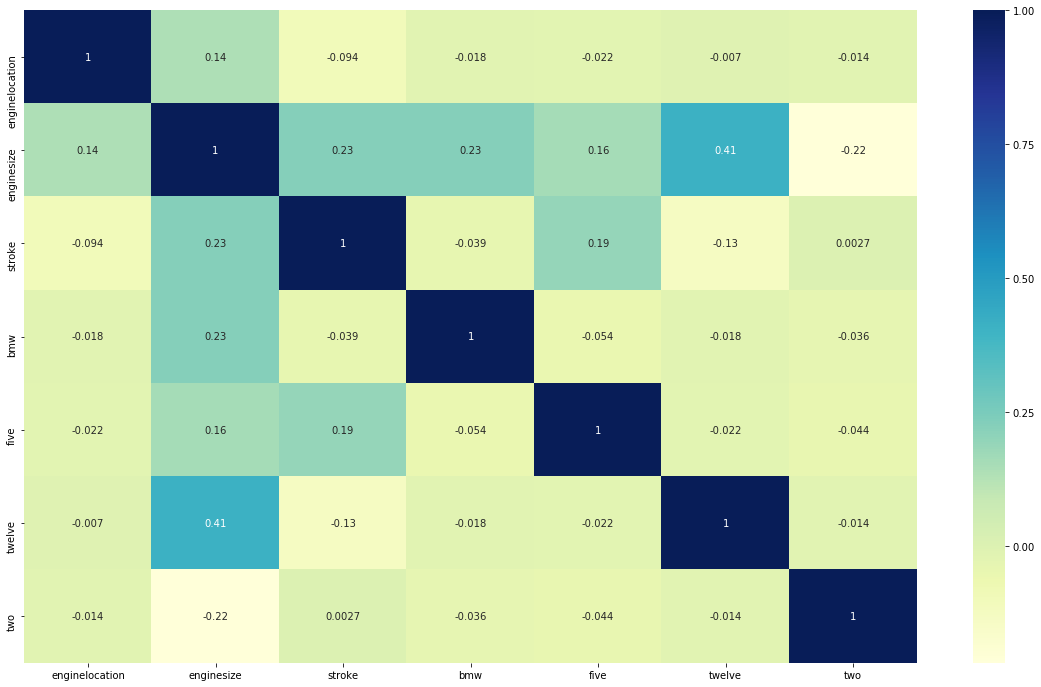

In [95]:
plt.figure(figsize=(20,12))
sns.heatmap(X_train_9.corr(), cmap='YlGnBu', annot=True)
plt.show()

#### <span style="color:blue">Observation from Corelation matrix, VIF and t-statistics</span>
- Again __enginesize__ has __VIF of 5.62__ but it has __t score more than 22__ that makes enginesize significant for prediction.<br>
- Whereas __stroke__ has __VIF 4.76__ but it has __t score -2.547__.
<br>

Also from the above heatmap, it is evident that:
- __stroke__ is positively corelated with __enginesize(0.23)__. It means when one variable value increase other varible values also increases. And instead of two variable only one variable is sufficient for prediction.
<br>

So <span style="color:red">__enginesize__</span> seems to be more statistically significant than <span style="color:red">__stroke__</span>

Retaining __enginesize__ and dropping __stroke__

#### Linear Model 10 - Rebuilding the model
Removing __stroke__ and again building linear model

In [96]:
X_train_10 = X_train_9.drop(['stroke'],axis=1)

In [97]:
import statsmodels.api as sm

# Adding constant
X_train_lm = sm.add_constant(X_train_10)

# Running the linear model
lm_10 = sm.OLS(y_train, X_train_lm).fit()

In [98]:
# Summary of linear model
print(lm_10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     146.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           7.49e-57
Time:                        22:58:24   Log-Likelihood:                 160.73
No. Observations:                 143   AIC:                            -307.5
Df Residuals:                     136   BIC:                            -286.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0983      0.014     -7.

In [99]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_10
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,enginesize,1.39
2,bmw,1.12
3,five,1.12
4,twelve,1.12
0,enginelocation,1.03
5,two,1.00


## 6. Residual analysis of train data

In [100]:
# Making predictions
y_train_price = lm_10.predict(X_train_lm)

In [101]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

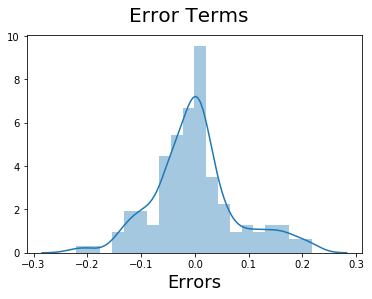

In [102]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### <span style="color:red">Observation of error terms on train data</span>
We can observe from the above Histogram that for __train data set error terms are normally distributed around its mean = 0.__

## 7. Making Predictions Using the Final Model

We have fitted the model and checked the normality of error terms. Now making prediction using final model

#### Applying scaling to the columns in test data

In [103]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['symboling','wheelbase','carlength','carwidth','carheight','curbweight','enginesize','boreratio',
            'stroke','compressionratio','horsepower','peakrpm','citympg','highwaympg','price']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [104]:
df_test.describe()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,three,twelve,two,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.0,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.583871,0.112903,0.822581,0.564516,0.032258,0.437764,0.559481,0.480376,0.559663,0.428470,...,0.0,0.0,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129
std,0.271724,0.319058,0.385142,0.499868,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,...,0.0,0.0,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.400000,0.000000,1.000000,0.000000,0.000000,0.313793,0.459350,0.358333,0.384956,0.305275,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.600000,0.000000,1.000000,1.000000,0.000000,0.387931,0.547967,0.441667,0.588496,0.406129,...,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000
75%,0.800000,0.000000,1.000000,1.000000,0.000000,0.570690,0.719919,0.516667,0.699115,0.564876,...,0.0,0.0,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,...,0.0,0.0,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test of test data

In [105]:
# We want to predit price so this will be outcome variable and y set will be comprised of 'price' column
y_test = df_test.pop('price')

# Rest of the column will be treated as predictor variables
X_test = df_test

In [106]:
# Creating X_test_new dataframe by applying learning from final train dataset X_train_10
X_test_new = X_test[X_train_10.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [107]:
# Making predictions
y_pred = lm_10.predict(X_test_new)

## 8. Model Evaluation

#### Plotting the histogram of the error terms on test data

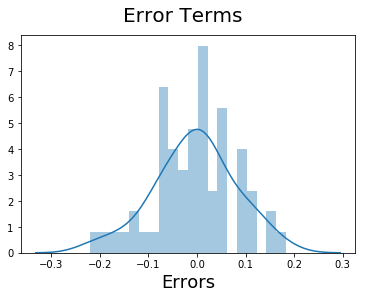

In [108]:
# Plotting the histogram of the error terms on test data
fig = plt.figure()
sns.distplot((y_test-y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

#### <span style="color:red">Observation of error terms on test data</span>
We can observe from the above Histogram that for __test data set__ also__error terms are normally distributed around its mean = 0.__

#### Plotting y_test and y_pred to understand the spread.

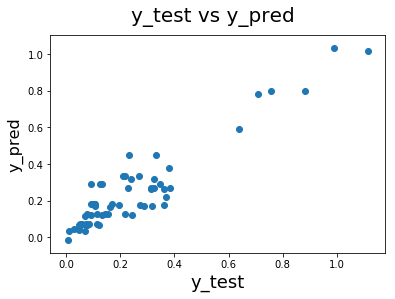

In [109]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

__We can formulate the equation of our best fitted line:__<br>
$ price = (0.2870 \times enginelocation) + (1.2154 \times enginesize) + (0.2011 \times bmc ) + (0.1320 \times five ) - (0.2639 \times twelve) + (0.2639 \times two)$

#### <span style="color:red">Observation of y_test vs y_predicted</span>
We can observe from the above scatter plot that the __Model created is able to capture linear association very well__.

#### Plot to observe any visible pattern in error term

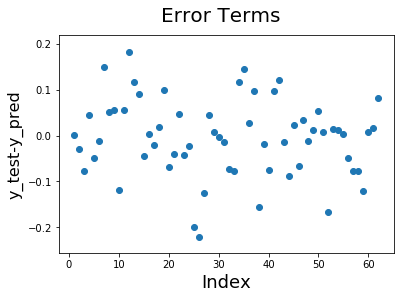

In [110]:
# Plot to observe any visible pattern in error term
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.scatter(c, y_test-y_pred)
fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('y_test-y_pred', fontsize=16)                               # Y-label

#### <span style="color:red">Observation of error terms</span>
We can observe from the above scatter plot that the __there are no patterns in error terms obtained from test data__.

#### Calculating r2_score on test data

In [111]:
from sklearn import metrics
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.86900376773350818

#### Calculating MSE(Mean Squared Error) and RMSE(root mean squared error) on test data

In [112]:
print('MSE(Mean Squared Error) :', metrics.mean_squared_error(y_test, y_pred))

MSE(Mean Squared Error) : 0.00700151739157


In [113]:
print('RMSE(Root Mean Squared Error) :', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

RMSE(Root Mean Squared Error) : 0.0836750703111


#### Actual price vs Predicted price
Plotting the line graph to check how much variation is there in the actual value of test data and predicted value on test data.

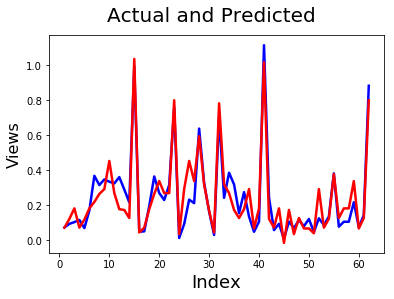

In [114]:
# Actual vs Predicted
c = [i for i in range(1,63,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Views', fontsize=16)                               # Y-label

#### Summary
From the above Model evaluation we can conclude that :
- The Model build is a good one.
- Model is able to explain 0.8690 i.e 86.90% variance in test data.
- It also holds all the assumption
  - Error terms (Residual) are normally distributed around mean = 0
  - There are no pattern in errors.
  - Error terms are independent of each other.

# 9. Conclusion

__Model Number 10 i.e lm_10 is the final model. It predicts the car price data with sufficient accuracy.__

#### Predictor variable affecting price of cars are
1. __enginesize__
2. __bmw (CarName)__
3. __five (cylindernumber)__
4. __twelve (cylindernumber)__
5. __enginelocation__
6. __two (cylindernumber)__

#### Statistics of predictor variable
All the above predictor variables has:
- __p-value equal to or close to 0__
- __ All has VIF less than 2__
- __All the predictor found are statistically significant.__

#### Statistics about overall model
| Statistics | Value |
| --- | --- |
|R-squared | 0.866 |
|Adj. R-squared | 0.860 |
|F-statistic | 146.7 |
|Prob (F-statistic) | 7.49e-57 |
|Log-Likelihood | 160.73 |
|AIC | -307.5 |
|BIC | -286.7 |

#### Observation on test data set
- __R2_score - 0.8690__
- __RMSE(Root mean squared error) - 0.08367__

#### Observation
1. __Engine size(enginesize)__ i.e. size of car definately affects Price of car.
2. __Car brand name(bmw)__ particularly BMW has huge impact on Car prices.
3. __Engine location(enginelocation)__ wether it is at __front or rear__ also impact the overall price of car.
4. __Cylinder Number(two, five, twelve)__ also involved in up/down of prices of car.

#### Recommendation
From the above observation some recommendation for Geely Auto are:
- Make cars with keep in mind about size, engine location and cylinder number.
- Study or do research on different Car brand.